In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import os
import time

tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [6]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.cifar10.load_data()

train_data = train_data / 255.
train_data = train_data.reshape([-1, 3, 32, 32])
train_data = train_data.astype(np.float32)
train_labels = train_labels.reshape([-1])
train_labels = train_labels.astype(np.int32)

test_data = test_data / 255.
test_data = test_data.reshape([-1, 3, 32, 32])
test_data = test_data.astype(np.float32)
test_labels = test_labels.reshape([-1])
test_labels = test_labels.astype(np.int32)

print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

170500096/170498071 [==============================] - 1261s 7us/step
(50000, 3, 32, 32) (50000,)
(10000, 3, 32, 32) (10000,)


In [7]:
def one_hot_label(image, label):
  label = tf.one_hot(#TODO)
  return image, label

In [8]:
batch_size = 32
max_epochs = 10

# for train
N = len(train_data)
train_dataset = tf.data.Dataset.from_tensor_slices((# TODO))
train_dataset = train_dataset.shuffle(buffer_size=10000)
train_dataset = train_dataset.map(#TODO)
train_dataset = # TODO set repeat and batch size
print(train_dataset)

# for test
test_dataset = tf.data.Dataset.from_tensor_slices(# TODO)
test_dataset = test_dataset.map(# TODO)
test_dataset = # TODO set repeat and batch size
print(test_dataset)

<DatasetV1Adapter shapes: ((?, 32, 32, 3), (?, 100)), types: (tf.float32, tf.float32)>
<DatasetV1Adapter shapes: ((?, 32, 32, 3), (?, 100)), types: (tf.float32, tf.float32)>


label = 8


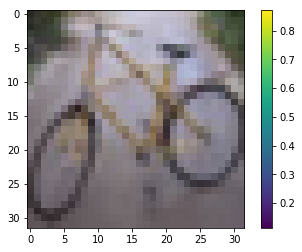

In [9]:
index = 219
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index].reshape(32, 32, 3))
plt.colorbar()
#plt.gca().grid(False)
plt.show()

In [10]:
model = tf.keras.models.Sequential()
# TODO Make a model


In [11]:
# without training, just inference a model in eager execution:
predictions = model(train_data[0:1], training=False)
print("Predictions: ", predictions.numpy())

Predictions:  [[0.01121681 0.00953528 0.01019697 0.010187   0.00989303 0.00998305
  0.00961746 0.01059671 0.0098941  0.00956916 0.00937781 0.01010783
  0.00951114 0.00913186 0.01009857 0.0096671  0.00985264 0.01008819
  0.01017263 0.00977632 0.00991701 0.00953489 0.00951697 0.01051824
  0.00928196 0.00970291 0.01027116 0.01021115 0.01065397 0.01012069
  0.00972656 0.00957246 0.00982559 0.00984982 0.00951151 0.01109537
  0.01002577 0.01073958 0.01048039 0.00971781 0.01016087 0.01069308
  0.0095928  0.00992474 0.0103055  0.01070641 0.00968157 0.0094423
  0.01102694 0.01036623 0.01007621 0.01014665 0.00983529 0.00988729
  0.00948267 0.01048179 0.01002157 0.01068911 0.01023522 0.0098393
  0.00952924 0.00962782 0.01091783 0.01050968 0.00991769 0.01015003
  0.00971645 0.0098599  0.00928846 0.00962424 0.00973031 0.00993756
  0.00955349 0.00983175 0.00998989 0.00983428 0.01004648 0.01065644
  0.00994436 0.01027515 0.00991544 0.00967972 0.00960118 0.00915917
  0.01005995 0.01017844 0.01092689 0

In [12]:
model.compile(optimizer=tf.train.AdamOptimizer(1e-4),
              loss=tf.keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  4194560   
_________________________________________________________________
dense_1 (Dense)              multiple                  3

In [14]:
history = model.fit(# TODO, 
                    epochs=max_epochs,
                    steps_per_epoch=int(len(train_data) / batch_size))


W0725 22:59:39.664211 140472030582592 deprecation.py:323] From /home/ssojux2/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
1562/1562 [==============================] - 16s 10ms/step - loss: 3.9873 - acc: 0.0537
Epoch 2/10
1562/1562 [==============================] - 15s 10ms/step - loss: 3.3103 - acc: 0.1992
Epoch 3/10
1562/1562 [==============================] - 15s 10ms/step - loss: 2.9738 - acc: 0.2609
Epoch 4/10
1562/1562 [==============================] - 17s 11ms/step - loss: 2.7548 - acc: 0.3075
Epoch 5/10
1562/1562 [==============================] - 16s 10ms/step - loss: 2.5811 - acc: 0.3433
Epoch 6/10
1562/1562 [==============================] - 16s 10ms/step - loss: 2.4311 - acc: 0.3769
Epoch 7/10
1562/1562 [==============================] - 15s 10ms/step - loss: 2.2994 - acc: 0.4046
Epoch 8/10
1562/1562 [==============================] - 15s 10ms/step - loss: 2.1788 - acc: 0.4337
Epoch 9/10
1562/1562 [==============================] - 15s 10ms/step - loss: 2.0646 - acc: 0.4606
Epoch 10/10
1562/1562 [==============================] - 16s 10ms/step - loss: 1.9478 - acc: 0.4882


In [15]:
results = model.evaluate(test_dataset, steps=int(len(train_data) / batch_size))

1562/1562 [==============================] - 7s 4ms/step - loss: 2.4693 - acc: 0.3857


In [16]:
# loss
print("loss value: {:.3f}".format(results[0]))
# accuracy
print("accuracy value: {:.4f}%".format(results[1]*100))

loss value: 2.469
accuracy value: 38.5703%


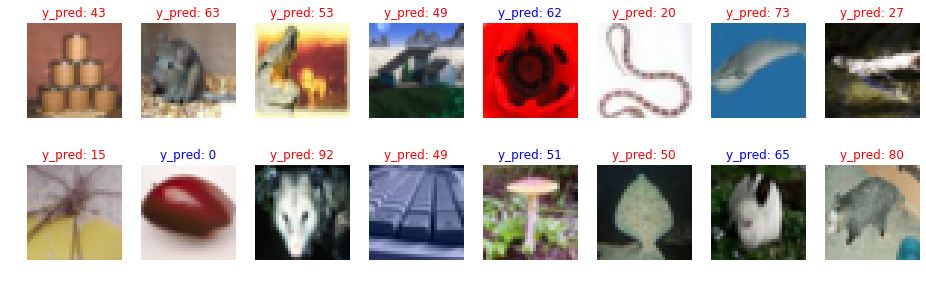

In [18]:
np.random.seed(219)
test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)

batch_xs = test_data[batch_index]
batch_ys = test_labels[batch_index]
y_pred_ = model(batch_xs, training=False)

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred_)):
  p = fig.add_subplot(4, 8, i+1)
  if np.argmax(py) == batch_ys[i]:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='blue')
  else:
    p.set_title("y_pred: {}".format(np.argmax(py)), color='red')
  p.imshow(px.reshape(32, 32, 3))
  p.axis('off')